# Task 4.2. Operations on histograms 1.3. - 1.15.
---
***Author: Piotr Skalski***

## Imports

In [1]:
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [26]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "hist1.bmp"

## Loading images

In [27]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

## Display the basic histogram

In [76]:
# creation of a cumulative histogram
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

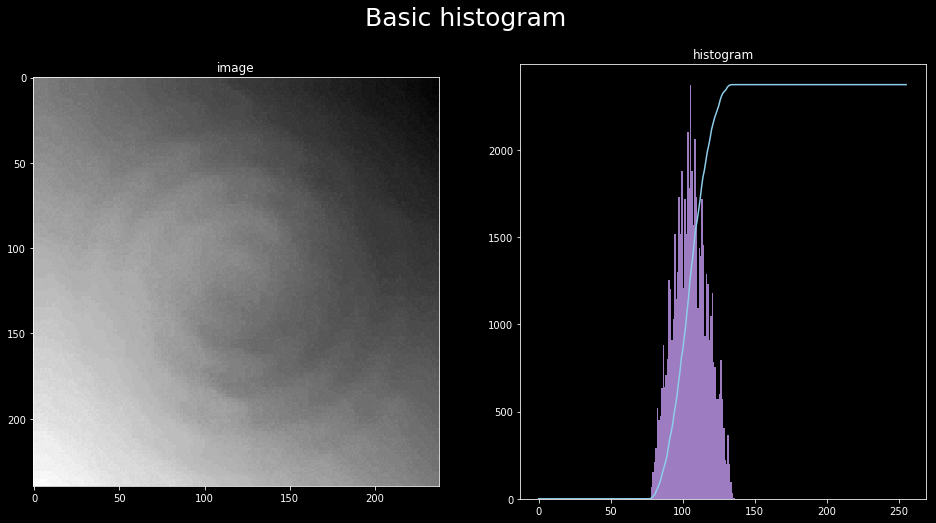

In [77]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Basic histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## Aqualizedd histogram

In [81]:
image_max = image.max()
image_min = image.min()

In [84]:
def streach_histogram(value):
    return ((value - image_min)/(image_max - image_min))*255

streach_histogram = np.vectorize(streach_histogram)

In [85]:
image_adj = streach_histogram(image)

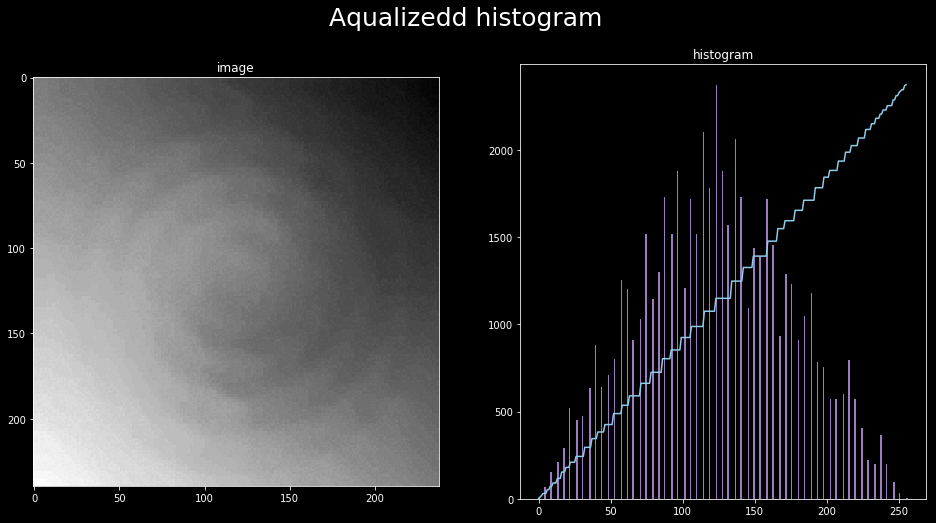

In [89]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Aqualizedd histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image_adj, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image_adj.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_adj, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## Equalized histogram

In [86]:
# equalized histogram
image_eq = cv2.equalizeHist(image)

# creation of a cumulative histogram
hist,bins = np.histogram(image_eq.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_eq = cdf * hist.max()/ cdf.max()

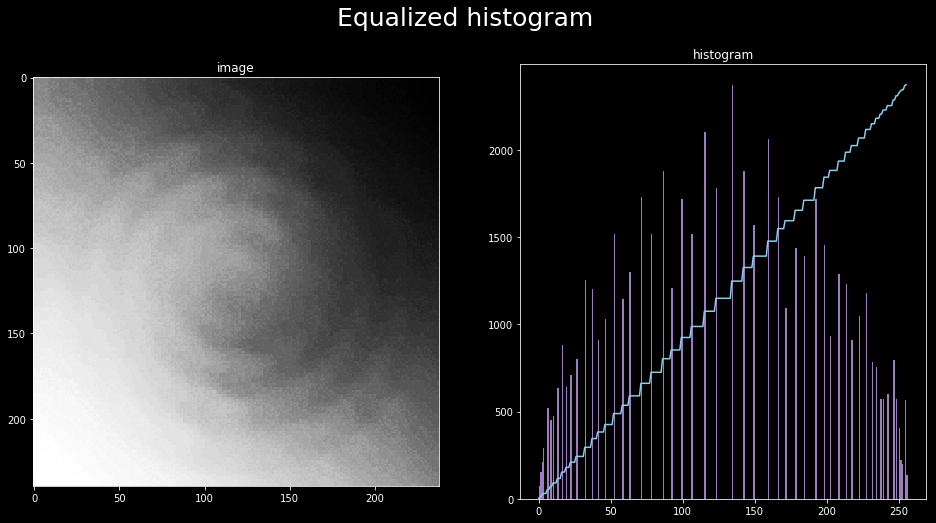

In [87]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Equalized histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image_eq, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image_eq.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_eq, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## LUT

In [69]:
# building look up table
look_up_table = (255 * cdf_base) // cdf_base.max()
image_lut = cv2.LUT(image, look_up_table)

# creation of a cumulative histogram
hist,bins = np.histogram(image_lut.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_lut = cdf * hist.max()/ cdf.max()

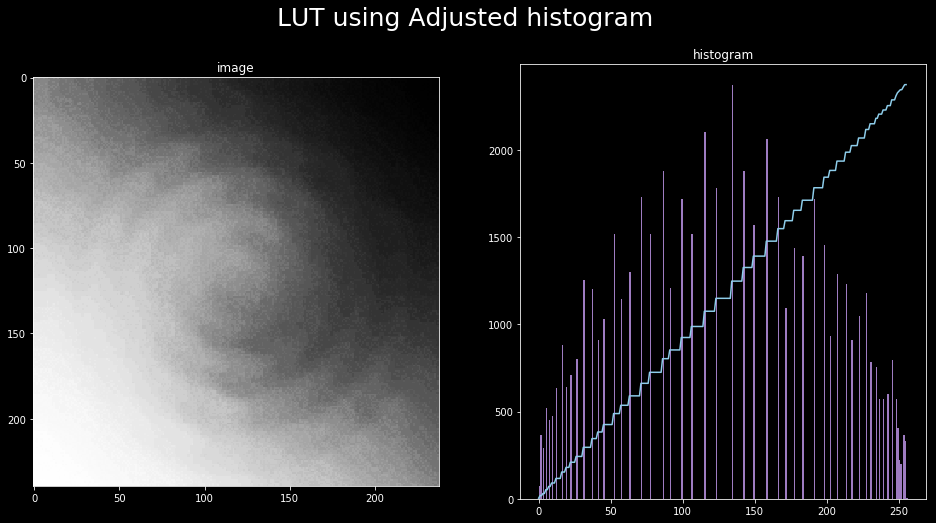

In [70]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('LUT using Adjusted histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image_lut, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image_lut.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_lut, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## CLAHE

In [90]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image_cl1 = clahe.apply(image)

In [92]:
# creation of a cumulative histogram
hist,bins = np.histogram(image_cl1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_cl1 = cdf * hist.max()/ cdf.max()

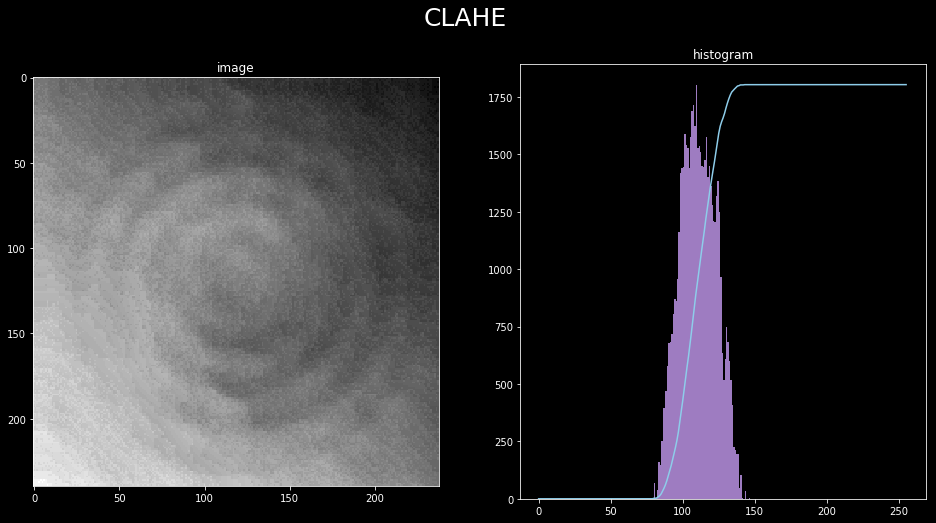

In [93]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('CLAHE', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image_cl1, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image_cl1.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_cl1, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## Resources 

[OpenCV Histogram Equalization](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html)